<!-- Project developed in Data Science Academy - www.datascienceacademy.com.br -->
# <font color='grey'>Data Science Academy</font>
## <font color='grey'>Software Engineering for Machine Learning</font>
## <font color='green'>Project 1 - Machine Learning Web App Integration</font>

In [380]:
# Package for easily adding watermarks to PDF, JPG & PNG files
!pip install -q -U watermark

In [381]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [382]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Data Loading

In [383]:
# Loading the dataset
df_dsa = pd.read_csv('dataset.csv')

In [384]:
# Shape (rows, columns)
df_dsa.shape

(64461, 61)

In [385]:
# Data Sample (First 5 rows)
df_dsa.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## Attributes Engineering & Data Cleaning

We want to make a salary prediction of a tech professional. We will work with some predictor variables and the target variable will be ConvertedComp (financial compensation).

In [386]:
# Filtering some columns of the dataset
df = df_dsa[["Country", "DevType", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]


In [387]:
# Change variable name
df = df.rename(columns={"ConvertedComp": "Salary"})

In [388]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [389]:
df.tail()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
64456,United States,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Less than 1 year,Employed full-time,NaN
64457,Morocco,NaN,NaN,NaN,Employed full-time,NaN
64458,Viet Nam,NaN,Primary/elementary school,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,Employed full-time,NaN
64460,Spain,NaN,"Other doctoral degree (Ph.D., Ed.D., etc.)",NaN,Employed full-time,NaN


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       64072 non-null  object 
 1   DevType       49370 non-null  object 
 2   EdLevel       57431 non-null  object 
 3   YearsCodePro  46349 non-null  object 
 4   Employment    63854 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


### Missing Values Treatment

In [391]:
# Removing missing values from the target variable
df = df[df['Salary'].notnull()] 

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   DevType       34367 non-null  object 
 2   EdLevel       34188 non-null  object 
 3   YearsCodePro  34621 non-null  object 
 4   Employment    34717 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [393]:
# Removing missing values from the dataset
df = df.dropna()

In [394]:
# Checking for missing values (No missing values anymore)
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

### Employment column treatment

In [395]:
# Checking the unique values of the 'Employment' column
df['Employment'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time'], dtype=object)

In [396]:
# Checking the frequency of each unique value in the 'Employment' column
df['Employment'].value_counts()

Employment
Employed full-time                                      29722
Independent contractor, freelancer, or self-employed     2977
Employed part-time                                        997
Name: count, dtype: int64

In [397]:
# Filtering the dataset for only those who are employed full-time (majority class)
df = df[df['Employment'] == 'Employed full-time']

In [398]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,"Designer;Developer, front-end",Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [399]:
# Removing the 'Employment' column because it became a constant column
df = df.drop('Employment', axis=1)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29722 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       29722 non-null  object 
 1   DevType       29722 non-null  object 
 2   EdLevel       29722 non-null  object 
 3   YearsCodePro  29722 non-null  object 
 4   Salary        29722 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


### DevType column treatment

In [401]:
df['DevType'].unique()

array(['Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics',
       'Database administrator;Developer, full-stack;Developer, mobile',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end',
       ...,
       'Developer, back-end;Developer, front-end;Developer, full-stack;DevOps specialist;Engineer, data;Engineering manager',
       'Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Engineer, data;Engineering manager;System administrator',
       'Developer, full-stack;Developer, QA or test;System administrator'],
      dtype=object)

In [402]:
# Convert the 'DevType' column to a list of strings
df['DevType'] = df['DevType'].str.split(';')

In [403]:
df['DevType'] = df['DevType'].str[0]

In [404]:
len(df['DevType'].unique())

23

In [405]:
# Checking the frequency by category
df['DevType'].value_counts()

DevType
Developer, back-end                              11763
Developer, full-stack                             3849
Database administrator                            2155
Developer, front-end                              1997
Data or business analyst                          1870
Academic researcher                               1769
Designer                                          1438
Developer, desktop or enterprise applications     1324
Data scientist or machine learning specialist     1142
Developer, mobile                                  826
Developer, embedded applications or devices        526
DevOps specialist                                  255
Developer, QA or test                              204
Engineer, data                                     129
Engineering manager                                114
Developer, game or graphics                        104
System administrator                                72
Engineer, site reliability                          47
Se

In [406]:
# Function to replace categories of a column below the cutoff with 'Other'
def cutoff_categories(categories, cutoff):
    # Calculate the value counts of the categories
    value_counts = categories.value_counts()
    
    # Determine which categories to keep
    to_keep = value_counts[value_counts >= cutoff].index
    
    # Optimized version with vetorized pandas operation isin()
    return categories.where(categories.isin(to_keep), other='Other')

    # Alternative version using apply(), which is slower
    #return categories.apply(lambda cat: cat if cat in to_keep else 'Other')

In [407]:
# Applying the function to the 'DevType' column
# Changes categories with a frequency less than 100 to 'Other'
df['DevType'] = cutoff_categories(df['DevType'], 100)

In [408]:
print(df['DevType'].value_counts())

DevType
Developer, back-end                              11763
Developer, full-stack                             3849
Database administrator                            2155
Developer, front-end                              1997
Data or business analyst                          1870
Academic researcher                               1769
Designer                                          1438
Developer, desktop or enterprise applications     1324
Data scientist or machine learning specialist     1142
Developer, mobile                                  826
Developer, embedded applications or devices        526
Other                                              257
DevOps specialist                                  255
Developer, QA or test                              204
Engineer, data                                     129
Engineering manager                                114
Developer, game or graphics                        104
Name: count, dtype: int64


In [409]:
df[df['DevType'] == 'Other']

,Country,DevType,EdLevel,YearsCodePro,Salary
143,United Kingdom,Other,"Secondary school (e.g. American high school, G...",3,32315.0
251,United States,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",19,450000.0
271,United Kingdom,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,23267.0
372,Canada,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20,136136.0
437,United States,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,170000.0
...,...,...,...,...,...
61605,United States,Other,"Associate degree (A.A., A.S., etc.)",Less than 1 year,310000.0
61663,United States,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Less than 1 year,55000.0
61702,United States,Other,"Associate degree (A.A., A.S., etc.)",2,167000.0
62179,United States,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,110000.0


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29722 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       29722 non-null  object 
 1   DevType       29722 non-null  object 
 2   EdLevel       29722 non-null  object 
 3   YearsCodePro  29722 non-null  object 
 4   Salary        29722 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


### Country column treatment

In [411]:
df['Country'].value_counts()

Country
United States     7468
India             2409
United Kingdom    2247
Germany           1891
Canada            1161
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [412]:
df['Country'] = cutoff_categories(df['Country'], 400)

In [413]:
df.Country.value_counts()

Country
Other                 8482
United States         7468
India                 2409
United Kingdom        2247
Germany               1891
Canada                1161
Brazil                 985
France                 966
Spain                  666
Australia              650
Netherlands            648
Poland                 564
Italy                  556
Russian Federation     521
Sweden                 508
Name: count, dtype: int64

In [414]:
len(df.Country.unique())

15

### Filtering outliers

<function matplotlib.pyplot.show(close=None, block=None)>

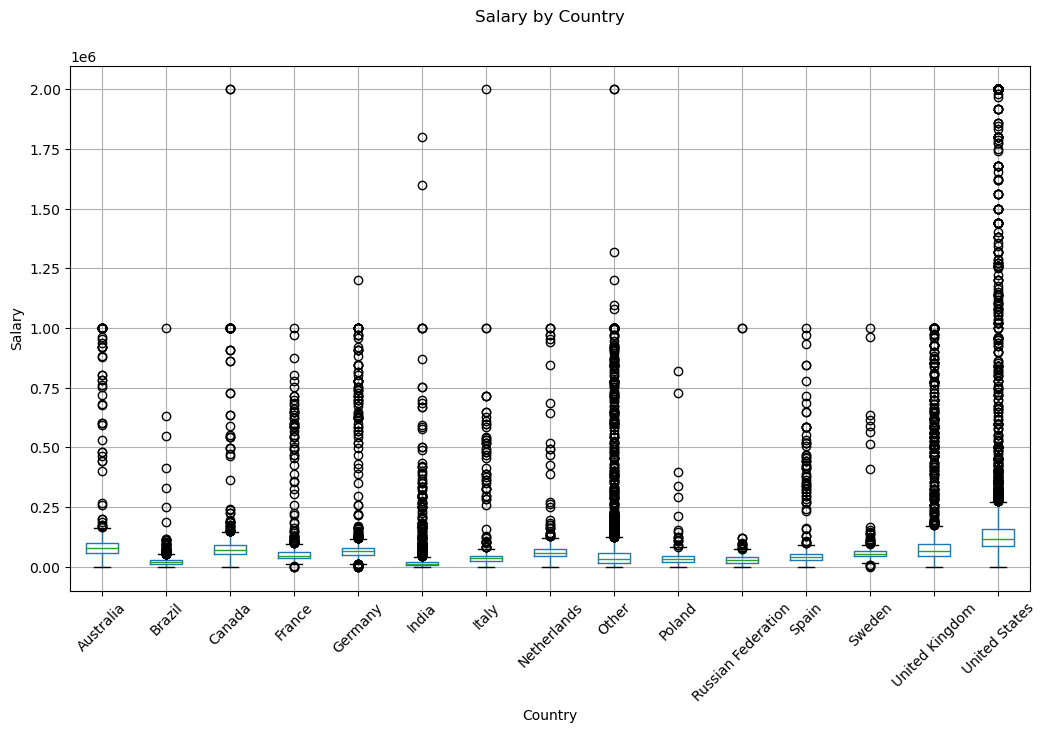

In [415]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot(column='Salary', by='Country', ax=ax)
plt.suptitle('Salary by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 45)
plt.show

In [416]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 5000]
df = df[df['Country'] != 'Other']
df = df[df['DevType'] != 'Other']
df = df[df['DevType'] != 'Other (please specify):']

In [417]:
df.shape

(19047, 5)

In [418]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,United States,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,Database administrator,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Designer,Some college/university study without earning ...,7,14268.0
12,Netherlands,Designer,"Secondary school (e.g. American high school, G...",20,38916.0


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19047 entries, 7 to 64129
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       19047 non-null  object 
 1   DevType       19047 non-null  object 
 2   EdLevel       19047 non-null  object 
 3   YearsCodePro  19047 non-null  object 
 4   Salary        19047 non-null  float64
dtypes: float64(1), object(4)
memory usage: 892.8+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

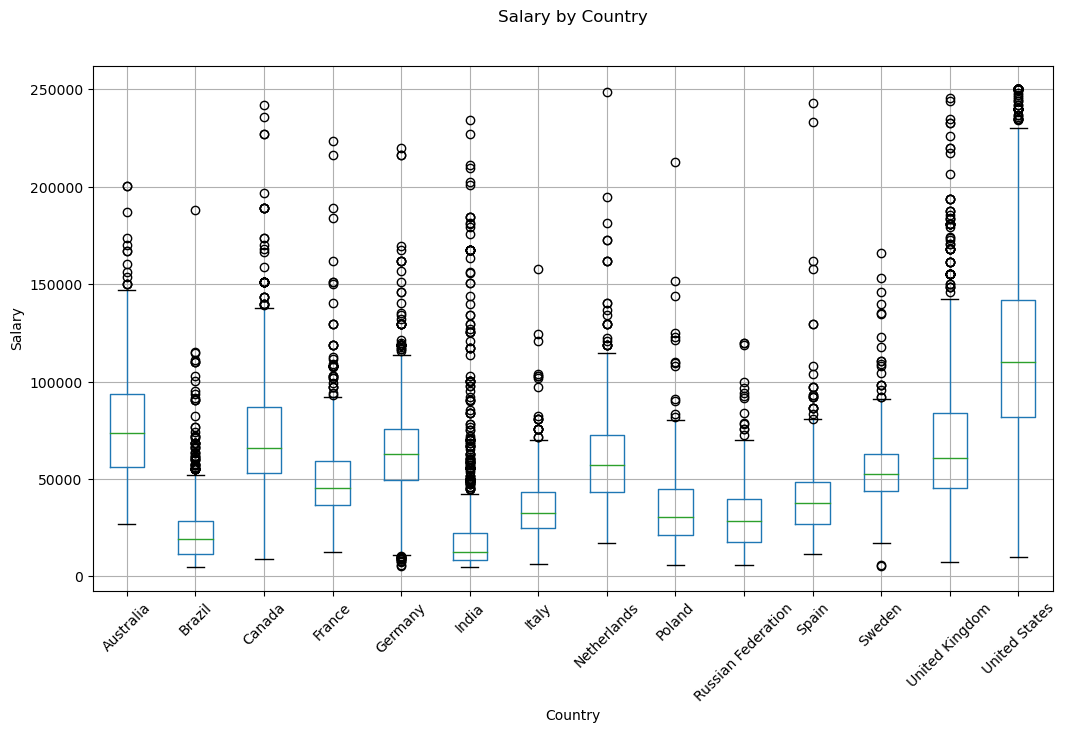

In [420]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot(column='Salary', by='Country', ax=ax)
plt.suptitle('Salary by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 45)
plt.show

### YearsCodePro column treatment

In [421]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [422]:
# Function to convert the 'YearsCodePro' column to a numeric format
def convert_years_professional(years_professional):
    if years_professional == 'Less than 1 year':
        return 0.5
    elif years_professional == 'More than 50 years':
        return 50
    else:
        return float(years_professional)

In [423]:
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_professional)

In [424]:
df['YearsCodePro'].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

### EdLevel column treatment

In [425]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [426]:
# Function to reduce the number of categories in the 'EdLevel' column
def reduce_edLevel_categories(ed_level):
    if 'Bachelor’s degree' in ed_level:
        return 'Bachelor’s degree'
    if 'Master’s degree' in ed_level:
        return 'Master’s degree'
    if 'Professional degree' in ed_level or 'Other doctoral' in ed_level:
        return 'Post grad'
    return 'Less than a Bachelors'

In [427]:
df['EdLevel'] = df['EdLevel'].apply(reduce_edLevel_categories)

In [428]:
df.EdLevel.value_counts()

EdLevel
Bachelor’s degree        9592
Master’s degree          4899
Less than a Bachelors    3599
Post grad                 957
Name: count, dtype: int64

In [429]:
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [430]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,United States,"Developer, back-end",Bachelor’s degree,13.0,116000.0
9,United Kingdom,Database administrator,Master’s degree,4.0,32315.0
10,United Kingdom,"Developer, back-end",Bachelor’s degree,2.0,40070.0
11,Spain,Designer,Less than a Bachelors,7.0,14268.0
12,Netherlands,Designer,Less than a Bachelors,20.0,38916.0


### Label Encoding 

In [431]:
# Mapping the categorical EdLevel to numerical values
map_ed_level = {'Less than a Bachelors': 0, 
                'Bachelor’s degree': 1, 
                'Master’s degree': 2, 
                'Post grad': 3}

In [432]:
df['EdLevel'] = df['EdLevel'].map(map_ed_level)

In [433]:
# Mapping the categorical Country to numerical values
map_country = {'Other': 0,  
            'United States': 1,
            'India': 2,
            'United Kingdom': 3,
            'Germany': 4,
            'Canada': 5,
            'Brazil': 6,
            'France': 7,
            'Spain': 8,
            'Australia': 9,
            'Netherlands': 10,
            'Poland': 11,
            'Italy': 12,
            'Russian Federation': 13,
            'Sweden': 14 }

In [434]:
df['Country'] = df['Country'].map(map_country)

In [435]:
# Mapping the categorical DevType to numerical values
map_dev_type = {'Developer, back-end': 0,
                'Developer, full-stack': 1,
                'Database administrator': 2,
                'Developer, front-end': 3, 
                'Data or business analyst': 4,
                'Academic researcher': 5,
                'Designer': 6,
                'Developer, desktop or enterprise applications': 7,
                'Data scientist or machine learning specialist': 8,
                'Developer, mobile': 9,
                'Developer, embedded applications or devices': 10,
                'Other': 11,
                'DevOps specialist': 12,
                'Developer, QA or test': 13,
                'Engineer, data': 14,
                'Engineering manager': 15,
                'Developer, game or graphics': 16}

In [436]:
df['DevType'] = df['DevType'].map(map_dev_type)

In [437]:
# Check periodically for missing values
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [438]:
df.head()

,Country,DevType,EdLevel,YearsCodePro,Salary
7,1,0,1,13.0,116000.0
9,3,2,2,4.0,32315.0
10,3,0,1,2.0,40070.0
11,8,6,0,7.0,14268.0
12,10,6,0,20.0,38916.0


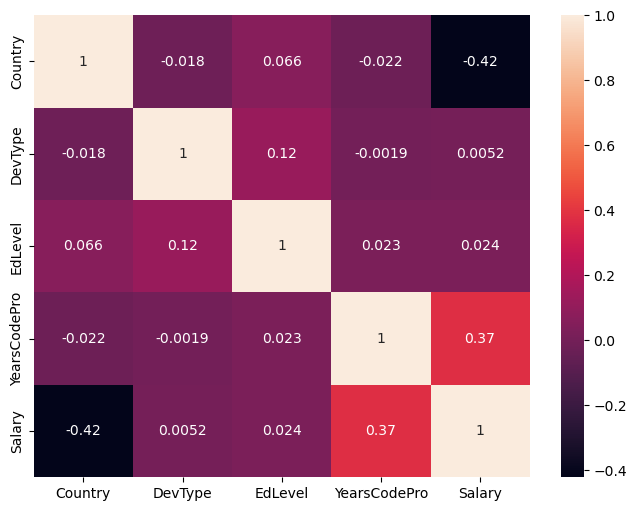

In [439]:
# Correlation matrix
## We seek to understand the relationship between the variables
## We want the predictors variables not being highly correlated, 
## because they can lead to multicollinearity
## We want the predictors to be highly correlated with the target variable
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True);

## Data Pre-Processing

In [440]:
# Splitting the dataset into predictors (X) and target variable (y)
X = df.drop('Salary', axis=1)
y = df.Salary

In [441]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [442]:
# Print the shape of the training and test sets
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}", 
      f"\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (15237, 4)
X_test shape: (3810, 4) 
y_train shape: (15237,)
y_test shape: (3810,)


In [443]:
# Standardizing the dataset 
scaler = StandardScaler()

In [444]:
# Fit the scaler on the X training set
X_train_scaled = scaler.fit_transform(X_train)

In [445]:
print("Mean:", scaler.mean_)
print("Standard Deviation:", scaler.scale_)

Mean: [4.34704994 2.73242764 1.16558378 8.71162302]
Standard Deviation: [3.82242513 3.3951746  0.78607825 7.60590762]


In [446]:
# Transform the X test set
X_test_scaled = scaler.transform(X_test)

In [447]:
# Save the scaler
# Creates a serialized representation of the scaler object
    # Serializing is the process of converting an object into a byte stream 
    # It facilitates transmission   
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [448]:
X_train_scaled

array([[-0.87563519, -0.51026172, -0.21064541, -0.88242237],
       [-0.35240715, -0.51026172, -0.21064541,  0.30086836],
       [-0.87563519, -0.51026172, -0.21064541, -1.07963749],
       ...,
       [-0.09079313, -0.80479739, -1.48278339, -0.75094562],
       [-0.35240715,  0.37334526, -0.21064541, -0.88242237],
       [ 2.26373304,  1.25695225, -0.21064541, -1.01389912]])

In [449]:
X_test_scaled

array([[ 1.47889098, -0.80479739, -0.21064541,  0.56382186],
       [-0.35240715, -0.21572606, -1.48278339,  0.16939162],
       [ 2.26373304,  1.55148791,  1.06149257,  0.03791487],
       ...,
       [-0.87563519,  1.55148791,  1.06149257,  3.06188007],
       [-0.35240715, -0.80479739, -0.21064541, -0.48799212],
       [-0.87563519,  0.0788096 ,  1.06149257, -0.75094562]])

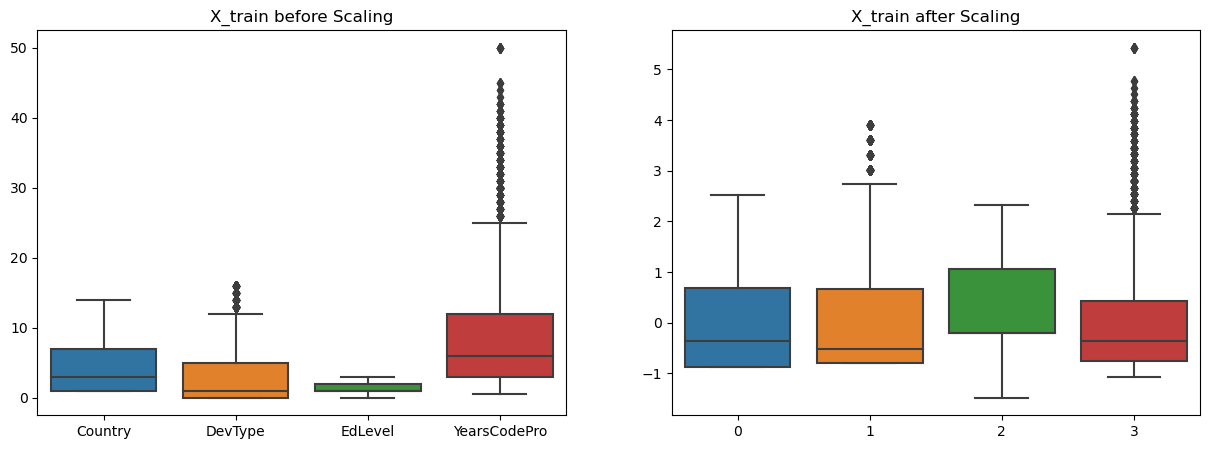

In [450]:
# Plotting the boxplots before and after scaling (2 subplots)
fig, ax = plt.subplots(1,2, figsize=(15, 5))

# Boxplot before scaling (left subplot)
sns.boxplot(data=X_train, ax=ax[0])
ax[0].set_title('X_train before Scaling')

# Boxplot after scaling (right subplot)
sns.boxplot(data=X_train_scaled, ax=ax[1])
ax[1].set_title('X_train after Scaling')

plt.show()

## Modelagem Preditiva

### Versão 1 do Modelo 

Algoritmo - Regressão Linear

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [451]:
# Creating the linear regression model
lr_model = LinearRegression()

In [452]:
# Fitting the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [453]:
# Coefficients and intercept learned by the model
print("Model Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Model Coefficients: [-20402.41186609   -232.77432071   2246.52853994  18010.15670058]
Intercept: 73154.83034718121


In [454]:
# Moddel hyperparameters
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [455]:
# Evaluating the model on the test set
y_pred_v1 = lr_model.predict(X_test_scaled)

### Model Evaluation Metrics

In [456]:
# Mean Absolute Percentage Error (MAPE)
# It gives the percentage of how much the predictions deviate from the actual values
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / np.clip(y_test, a_min=1e-10, a_max=None))) * 100

In [457]:
# Mean Absolute Error (MAE) 
    # Average of the absolute differences between predictions and actual values
    # It gives equal weight to all errors (small or large)
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, y_pred_v1), 3))

# Root Mean Squared Error (RMSE)
    # Square root of the average of the squared differences between predictions and actual values
    # It gives more weight to large errors
    # May be sensitive to outliers
print("Root Mean Squared Error (RMSE):", round(np.sqrt(mean_squared_error(y_test, y_pred_v1)), 3))

# Root Mean Squared Log Error (RMSLE)
    # Root mean squared logarithmic error
    # It gives more importance to the relative error
    # Penalizes underestimation more than overestimation
print("Root Mean Squared Log Error (RMSLE):", round(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_v1))), 3))

# Mean Absolute Percentage Error (MAPE)
print("Mean Absolute Percentage Error (MAPE):", round(mean_absolute_percentage_error(y_test, y_pred_v1), 3))

# R2 Score (R2) - Coefficient of Determination
    # It is the proportion of the variance in the dependent variable that is predictable from the independent variables
    # It provides an indication of goodness of fit
    # Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
print("R2 Score (R2):", round(r2_score(y_test, y_pred_v1), 6))

Mean Absolute Error (MAE): 30712.73
Root Mean Squared Error (RMSE): 40984.106
Root Mean Squared Log Error (RMSLE): 0.797
Mean Absolute Percentage Error (MAPE): 100.791
R2 Score (R2): 0.288011


### Interpretação das Métricas
- MAE: indica que, em média, o modelo erra cerca de 30.7 mil unidades monetárias ao prever os salários.

- RMSE: por ser maior que o MAE confirma que o modelo apresenta alguns erros mais extremos. Isso sugere que existem outliers (salários muito discrepantes) ou previsões com erros maiores que estão impactando o desempenho do modelo.

- RMSLE:  sugere que a discrepância entre os valores reais e previstos é significativa, mas porque está na escala logarítmica, ele também indica que os erros em valores menores (salários baixos) podem estar sendo mais bem capturados pelo modelo, enquanto erros em salários maiores não são tão penalizados.

- MAPE: indica que, em média, o modelo apresenta um erro percentual de 100.8% na previsão dos salários. Esse valor é muito alto, sugerindo que o modelo tem grande dificuldade em prever valores proporcionais aos salários reais.

- R²: indica que o modelo explica apenas 28.8% da variância nos dados de salários.
Esse valor é muito baixo, o que sugere que o modelo não está capturando bem a relação entre as variáveis preditoras e o salário. Há uma quantidade significativa de variabilidade nos dados que o modelo não consegue explicar.

### Conclusões Gerais

- Desempenho Fraco: As métricas apontam para um desempenho insatisfatório do modelo, com erros altos tanto absolutos (MAE, RMSE) quanto relativos (MAPE), e baixa explicação da variância (R²).

- Possíveis Problemas:
    - Outliers: O RMSE maior que o MAE sugere que outliers podem estar distorcendo o modelo.
    - Dados insuficientes ou irrelevantes: O baixo R² indica que as variáveis preditoras fornecem informações limitadas para explicar o salário.
    - Escala ou distribuição das variáveis: O RMSLE indica que há diferenças significativas na escala dos salários (muito baixos vs. muito altos), o que pode estar dificultando o aprendizado.

### Versão 2 do Modelo

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [458]:
dt_model = DecisionTreeRegressor(random_state = 1)

In [459]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=1)

In [460]:
y_pred_v2 = dt_model.predict(X_test_scaled)

In [462]:
# Mean Absolute Error (MAE) 
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, y_pred_v2), 3))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE):", round(np.sqrt(mean_squared_error(y_test, y_pred_v2)), 3))

# Root Mean Squared Log Error (RMSLE)
print("Root Mean Squared Log Error (RMSLE):", round(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_v2))), 3))

# Mean Absolute Percentage Error (MAPE)
print("Mean Absolute Percentage Error (MAPE):", round(mean_absolute_percentage_error(y_test, y_pred_v2), 3))

# R2 Score (R2) - Coefficient of Determination
print("R2 Score (R2):", round(r2_score(y_test, y_pred_v2), 6))

Mean Absolute Error (MAE): 23568.01
Root Mean Squared Error (RMSE): 34910.672
Root Mean Squared Log Error (RMSLE): 0.495
Mean Absolute Percentage Error (MAPE): 43.526
R2 Score (R2): 0.483395


### Interpretação das Métricas
- MAE:  o modelo de árvore de decisão reduziu o erro médio absoluto em aproximadamente 7 mil unidades monetárias. O modelo agora comete erros absolutos menores ao prever os salários.

- RMSE: também apresentou uma redução, sendo menos sensível a erros grandes (outliers). Como o RMSE ainda é maior que o MAE, alguns erros extremos ainda podem estar presentes, mas em menor grau.

- RMSLE:  reduziu significativamente de 0.797 para 0.495, indicando que o modelo está capturando melhor a proporção entre os valores previstos e os reais. Essa melhora sugere que as discrepâncias relativas em diferentes faixas de salários (valores baixos e altos) estão mais bem ajustadas agora.

- MAPE: O MAPE caiu de 100.791% para 43.526%, mostrando que o modelo agora apresenta um erro percentual médio muito menor. Em termos relativos, o modelo é mais confiável e as previsões estão muito mais próximas dos salários reais, proporcionalmente.

- R²: O R² aumentou de 0.288 para 0.483, o que significa que o modelo agora explica cerca de 48.3% da variância nos dados, em comparação com os 28.8% anteriores. Isso reflete uma maior capacidade do modelo de capturar as relações entre as variáveis preditoras (país, função, anos de experiência, nível educacional) e o salário.

### Conclusões Gerais

- O DecisionTreeRegressor apresentou uma melhoria significativa em todas as métricas, reduzindo tanto os erros absolutos quanto os relativos, além de explicar uma porção maior da variância nos dados.

- Modelo Não Linear Foi Mais Eficiente: A regressão linear (modelo anterior) assume uma relação linear entre as variáveis preditoras e o salário, enquanto o DecisionTreeRegressor pode capturar relações não lineares, que parecem ser mais adequadas para os dados.

- Apesar das melhorias, o RMSE e o MAE ainda indicam erros consideráveis em termos absolutos. Isso pode ser resultado de outliers nos salários ou ainda os dados são insuficientes ou variáveis irrelevantes (falta informações suficientes para o modelo prever salários com maior precisão).